## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [5]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [7]:
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=256, activation="relu")(input_layer)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()

In [8]:
"""
Compile 模型
"""
model = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 256)               786688    
_________________________________________________________________
dense_11 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1290      
Total params: 820,874
Trainable params: 820,874
Non-trainable params: 0
_________________________________________________________________


W0820 21:57:17.629190  8784 deprecation_wrapper.py:119] From C:\Users\Hsin-PC\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0820 21:57:17.735702  8784 deprecation_wrapper.py:119] From C:\Users\Hsin-PC\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [9]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

W0820 21:57:34.021055  8784 deprecation.py:323] From C:\Users\Hsin-PC\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0820 21:57:34.137432  8784 deprecation_wrapper.py:119] From C:\Users\Hsin-PC\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 14s 275us/step - loss: 1.9308 - acc: 0.3070 - val_loss: 1.7902 - val_acc: 0.3653
Epoch 2/500
50000/50000 [==============================] - 9s 172us/step - loss: 1.7337 - acc: 0.3872 - val_loss: 1.7071 - val_acc: 0.3887
Epoch 3/500
50000/50000 [==============================] - 8s 169us/step - loss: 1.6571 - acc: 0.4095 - val_loss: 1.6072 - val_acc: 0.4283
Epoch 4/500
50000/50000 [==============================] - 8s 164us/step - loss: 1.5864 - acc: 0.4398 - val_loss: 1.5491 - val_acc: 0.4602
Epoch 5/500
50000/50000 [==============================] - 8s 166us/step - loss: 1.5394 - acc: 0.4557 - val_loss: 1.5308 - val_acc: 0.4597
Epoch 6/500
50000/50000 [==============================] - 9s 175us/step - loss: 1.4999 - acc: 0.4712 - val_loss: 1.5253 - val_acc: 0.4572
Epoch 7/500
50000/50000 [==============================] - 9s 182us/step - loss: 1.4743 - acc: 0.4789 - val_loss: 1

50000/50000 [==============================] - 8s 162us/step - loss: 0.9732 - acc: 0.6556 - val_loss: 1.4471 - val_acc: 0.5139
Epoch 60/500
50000/50000 [==============================] - 8s 161us/step - loss: 0.9638 - acc: 0.6582 - val_loss: 1.4568 - val_acc: 0.5198
Epoch 61/500
50000/50000 [==============================] - 9s 177us/step - loss: 0.9575 - acc: 0.6608 - val_loss: 1.4612 - val_acc: 0.5155
Epoch 62/500
50000/50000 [==============================] - 9s 188us/step - loss: 0.9655 - acc: 0.6579 - val_loss: 1.5488 - val_acc: 0.4946
Epoch 63/500
50000/50000 [==============================] - 9s 179us/step - loss: 0.9575 - acc: 0.6592 - val_loss: 1.4899 - val_acc: 0.5198
Epoch 64/500
50000/50000 [==============================] - 9s 177us/step - loss: 0.9418 - acc: 0.6645 - val_loss: 1.4871 - val_acc: 0.5148
Epoch 65/500
50000/50000 [==============================] - 9s 170us/step - loss: 0.9455 - acc: 0.6629 - val_loss: 1.4826 - val_acc: 0.5229
Epoch 66/500
50000/50000 [=======

50000/50000 [==============================] - 8s 158us/step - loss: 0.7595 - acc: 0.7294 - val_loss: 1.7616 - val_acc: 0.4967
Epoch 118/500
50000/50000 [==============================] - 8s 159us/step - loss: 0.7696 - acc: 0.7251 - val_loss: 1.7822 - val_acc: 0.4957
Epoch 119/500
50000/50000 [==============================] - 8s 160us/step - loss: 0.7557 - acc: 0.7310 - val_loss: 1.7782 - val_acc: 0.5003
Epoch 120/500
50000/50000 [==============================] - 8s 158us/step - loss: 0.7501 - acc: 0.7329 - val_loss: 1.7558 - val_acc: 0.5024
Epoch 121/500
50000/50000 [==============================] - 8s 157us/step - loss: 0.7551 - acc: 0.7298 - val_loss: 1.7585 - val_acc: 0.4989
Epoch 122/500
50000/50000 [==============================] - 8s 156us/step - loss: 0.7431 - acc: 0.7363 - val_loss: 1.7332 - val_acc: 0.5076
Epoch 123/500
50000/50000 [==============================] - 8s 156us/step - loss: 0.7371 - acc: 0.7375 - val_loss: 1.7834 - val_acc: 0.5020
Epoch 124/500
50000/50000 [

50000/50000 [==============================] - 10s 193us/step - loss: 0.6264 - acc: 0.7754 - val_loss: 2.1162 - val_acc: 0.4927
Epoch 176/500
50000/50000 [==============================] - 9s 188us/step - loss: 0.6408 - acc: 0.7698 - val_loss: 2.0859 - val_acc: 0.4917
Epoch 177/500
50000/50000 [==============================] - 10s 195us/step - loss: 0.6158 - acc: 0.7807 - val_loss: 2.1031 - val_acc: 0.4852
Epoch 178/500
50000/50000 [==============================] - 10s 191us/step - loss: 0.6156 - acc: 0.7806 - val_loss: 2.1516 - val_acc: 0.4789
Epoch 179/500
50000/50000 [==============================] - 9s 178us/step - loss: 0.6240 - acc: 0.7773 - val_loss: 2.1056 - val_acc: 0.4930
Epoch 180/500
50000/50000 [==============================] - 9s 182us/step - loss: 0.6074 - acc: 0.7823 - val_loss: 2.1163 - val_acc: 0.4904
Epoch 181/500
50000/50000 [==============================] - 11s 222us/step - loss: 0.6152 - acc: 0.7799 - val_loss: 2.1212 - val_acc: 0.4909
Epoch 182/500
50000/500

50000/50000 [==============================] - 9s 173us/step - loss: 0.5222 - acc: 0.8151 - val_loss: 2.4362 - val_acc: 0.4808
Epoch 234/500
50000/50000 [==============================] - 9s 170us/step - loss: 0.5312 - acc: 0.8105 - val_loss: 2.4503 - val_acc: 0.4821
Epoch 235/500
50000/50000 [==============================] - 9s 170us/step - loss: 0.5183 - acc: 0.8150 - val_loss: 2.4419 - val_acc: 0.4798
Epoch 236/500
50000/50000 [==============================] - 9s 170us/step - loss: 0.5285 - acc: 0.8122 - val_loss: 2.4193 - val_acc: 0.4857
Epoch 237/500
50000/50000 [==============================] - 9s 171us/step - loss: 0.5075 - acc: 0.8199 - val_loss: 2.4355 - val_acc: 0.4864
Epoch 238/500
50000/50000 [==============================] - 9s 171us/step - loss: 0.5097 - acc: 0.8180 - val_loss: 2.4798 - val_acc: 0.4805
Epoch 239/500
50000/50000 [==============================] - 9s 171us/step - loss: 0.5197 - acc: 0.8140 - val_loss: 2.4339 - val_acc: 0.4826
Epoch 240/500
50000/50000 [

50000/50000 [==============================] - 9s 171us/step - loss: 0.4531 - acc: 0.8386 - val_loss: 2.7290 - val_acc: 0.4805
Epoch 292/500
50000/50000 [==============================] - 8s 169us/step - loss: 0.4504 - acc: 0.8390 - val_loss: 2.7221 - val_acc: 0.4838
Epoch 293/500
50000/50000 [==============================] - 8s 170us/step - loss: 0.4630 - acc: 0.8343 - val_loss: 2.7528 - val_acc: 0.4821
Epoch 294/500
50000/50000 [==============================] - 9s 170us/step - loss: 0.4589 - acc: 0.8361 - val_loss: 2.8255 - val_acc: 0.4773
Epoch 295/500
50000/50000 [==============================] - 9s 171us/step - loss: 0.4543 - acc: 0.8369 - val_loss: 2.7865 - val_acc: 0.4764
Epoch 296/500
50000/50000 [==============================] - 9s 174us/step - loss: 0.4384 - acc: 0.8442 - val_loss: 2.7957 - val_acc: 0.4752
Epoch 297/500
50000/50000 [==============================] - 8s 170us/step - loss: 0.4467 - acc: 0.8405 - val_loss: 2.7736 - val_acc: 0.4780
Epoch 298/500
50000/50000 [

50000/50000 [==============================] - 8s 169us/step - loss: 0.3896 - acc: 0.8612 - val_loss: 3.1328 - val_acc: 0.4779
Epoch 350/500
50000/50000 [==============================] - 9s 170us/step - loss: 0.4080 - acc: 0.8532 - val_loss: 3.0849 - val_acc: 0.4802
Epoch 351/500
50000/50000 [==============================] - 8s 170us/step - loss: 0.3867 - acc: 0.8632 - val_loss: 3.1278 - val_acc: 0.4727
Epoch 352/500
50000/50000 [==============================] - 8s 169us/step - loss: 0.3918 - acc: 0.8609 - val_loss: 3.1397 - val_acc: 0.4726
Epoch 353/500
50000/50000 [==============================] - 9s 171us/step - loss: 0.3724 - acc: 0.8679 - val_loss: 3.1399 - val_acc: 0.4725
Epoch 354/500
50000/50000 [==============================] - 9s 172us/step - loss: 0.3765 - acc: 0.8670 - val_loss: 3.1541 - val_acc: 0.4772
Epoch 355/500
50000/50000 [==============================] - 8s 170us/step - loss: 0.3857 - acc: 0.8609 - val_loss: 3.0696 - val_acc: 0.4743
Epoch 356/500
50000/50000 [

Epoch 407/500
50000/50000 [==============================] - 9s 170us/step - loss: 0.3577 - acc: 0.8710 - val_loss: 3.4576 - val_acc: 0.4661
Epoch 408/500
50000/50000 [==============================] - 9s 179us/step - loss: 0.3426 - acc: 0.8778 - val_loss: 3.3691 - val_acc: 0.4740
Epoch 409/500
50000/50000 [==============================] - 9s 183us/step - loss: 0.3434 - acc: 0.8766 - val_loss: 3.4330 - val_acc: 0.4742
Epoch 410/500
50000/50000 [==============================] - 10s 192us/step - loss: 0.3369 - acc: 0.8792 - val_loss: 3.4714 - val_acc: 0.4670
Epoch 411/500
50000/50000 [==============================] - 9s 188us/step - loss: 0.3455 - acc: 0.8753 - val_loss: 3.4086 - val_acc: 0.4646
Epoch 412/500
50000/50000 [==============================] - 8s 166us/step - loss: 0.3479 - acc: 0.8754 - val_loss: 3.4128 - val_acc: 0.4777
Epoch 413/500
50000/50000 [==============================] - 8s 165us/step - loss: 0.3608 - acc: 0.8707 - val_loss: 3.3772 - val_acc: 0.4764
Epoch 414/50

50000/50000 [==============================] - 9s 170us/step - loss: 0.2902 - acc: 0.8963 - val_loss: 3.7091 - val_acc: 0.4677
Epoch 466/500
50000/50000 [==============================] - 9s 170us/step - loss: 0.2971 - acc: 0.8948 - val_loss: 3.6957 - val_acc: 0.4722
Epoch 467/500
50000/50000 [==============================] - 8s 170us/step - loss: 0.3216 - acc: 0.8857 - val_loss: 3.6734 - val_acc: 0.4694
Epoch 468/500
50000/50000 [==============================] - 8s 168us/step - loss: 0.3367 - acc: 0.8799 - val_loss: 3.7306 - val_acc: 0.4689
Epoch 469/500
50000/50000 [==============================] - 9s 174us/step - loss: 0.3346 - acc: 0.8805 - val_loss: 3.7087 - val_acc: 0.4685
Epoch 470/500
50000/50000 [==============================] - 9s 174us/step - loss: 0.3223 - acc: 0.8840 - val_loss: 3.6946 - val_acc: 0.4726
Epoch 471/500
50000/50000 [==============================] - 9s 173us/step - loss: 0.3237 - acc: 0.8853 - val_loss: 3.7091 - val_acc: 0.4625
Epoch 472/500
50000/50000 [

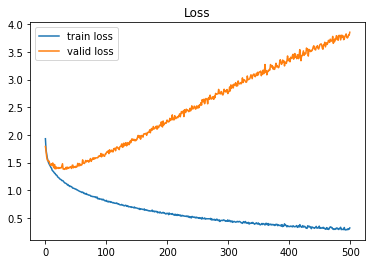

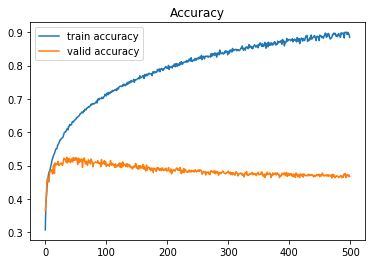

In [12]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

In [ ]:
'''
請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢
'''

In [14]:
model2 = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model2.summary()

optimizer = keras.optimizers.SGD(lr=0.001)
model2.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 256)               786688    
_________________________________________________________________
dense_17 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_18 (Dense)             (None, 10)                1290      
Total params: 820,874
Trainable params: 820,874
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.fit(x_train, y_train, 
          epochs=200, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 12s 245us/step - loss: 0.3081 - acc: 0.8894 - val_loss: 3.8573 - val_acc: 0.4652
Epoch 2/200
50000/50000 [==============================] - 8s 168us/step - loss: 0.2791 - acc: 0.9004 - val_loss: 3.8007 - val_acc: 0.4698
Epoch 3/200
50000/50000 [==============================] - 8s 170us/step - loss: 0.2831 - acc: 0.8988 - val_loss: 3.7992 - val_acc: 0.4685
Epoch 4/200
50000/50000 [==============================] - 9s 171us/step - loss: 0.3023 - acc: 0.8924 - val_loss: 3.7838 - val_acc: 0.4704
Epoch 5/200
50000/50000 [==============================] - 9s 171us/step - loss: 0.2779 - acc: 0.9008 - val_loss: 3.8601 - val_acc: 0.4703
Epoch 6/200
50000/50000 [==============================] - 9s 171us/step - loss: 0.2943 - acc: 0.8959 - val_loss: 3.8489 - val_acc: 0.4697
Epoch 7/200
50000/50000 [==============================] - 9s 172us/step - loss: 0.2960 - acc: 0.8942 - val_loss: 3

50000/50000 [==============================] - 8s 168us/step - loss: 0.2473 - acc: 0.9129 - val_loss: 4.0962 - val_acc: 0.4611
Epoch 60/200
50000/50000 [==============================] - 8s 167us/step - loss: 0.2600 - acc: 0.9076 - val_loss: 4.0778 - val_acc: 0.4673
Epoch 61/200
50000/50000 [==============================] - 8s 166us/step - loss: 0.2540 - acc: 0.9097 - val_loss: 4.0381 - val_acc: 0.4677
Epoch 62/200
50000/50000 [==============================] - 8s 167us/step - loss: 0.2525 - acc: 0.9106 - val_loss: 4.0584 - val_acc: 0.4671
Epoch 63/200
50000/50000 [==============================] - 8s 168us/step - loss: 0.3004 - acc: 0.8935 - val_loss: 4.0798 - val_acc: 0.4679
Epoch 64/200
50000/50000 [==============================] - 8s 169us/step - loss: 0.2258 - acc: 0.9217 - val_loss: 4.1358 - val_acc: 0.4665
Epoch 65/200
50000/50000 [==============================] - 8s 168us/step - loss: 0.2556 - acc: 0.9072 - val_loss: 4.0963 - val_acc: 0.4631
Epoch 66/200
50000/50000 [=======

50000/50000 [==============================] - 8s 167us/step - loss: 0.2688 - acc: 0.9046 - val_loss: 4.3117 - val_acc: 0.4592
Epoch 118/200
50000/50000 [==============================] - 8s 166us/step - loss: 0.2401 - acc: 0.9150 - val_loss: 4.3648 - val_acc: 0.4622
Epoch 119/200
50000/50000 [==============================] - 8s 168us/step - loss: 0.2150 - acc: 0.9255 - val_loss: 4.2947 - val_acc: 0.4663
Epoch 120/200
50000/50000 [==============================] - 8s 166us/step - loss: 0.2364 - acc: 0.9158 - val_loss: 4.3049 - val_acc: 0.4594
Epoch 121/200
50000/50000 [==============================] - 8s 166us/step - loss: 0.2445 - acc: 0.9122 - val_loss: 4.2663 - val_acc: 0.4657
Epoch 122/200
50000/50000 [==============================] - 8s 168us/step - loss: 0.2118 - acc: 0.9258 - val_loss: 4.3037 - val_acc: 0.4695
Epoch 123/200
50000/50000 [==============================] - 8s 166us/step - loss: 0.2628 - acc: 0.9060 - val_loss: 4.2704 - val_acc: 0.4651
Epoch 124/200
50000/50000 [

50000/50000 [==============================] - 8s 167us/step - loss: 0.2935 - acc: 0.8964 - val_loss: 4.4754 - val_acc: 0.4654
Epoch 176/200
50000/50000 [==============================] - 8s 166us/step - loss: 0.2109 - acc: 0.9260 - val_loss: 4.4500 - val_acc: 0.4685
Epoch 177/200
50000/50000 [==============================] - 8s 167us/step - loss: 0.1928 - acc: 0.9325 - val_loss: 4.4848 - val_acc: 0.4682
Epoch 178/200
50000/50000 [==============================] - 8s 169us/step - loss: 0.2052 - acc: 0.9269 - val_loss: 4.5186 - val_acc: 0.4633
Epoch 179/200
50000/50000 [==============================] - 8s 167us/step - loss: 0.2128 - acc: 0.9241 - val_loss: 4.4816 - val_acc: 0.4623
Epoch 180/200
50000/50000 [==============================] - 9s 171us/step - loss: 0.2384 - acc: 0.9147 - val_loss: 4.4782 - val_acc: 0.4655
Epoch 181/200
50000/50000 [==============================] - 9s 172us/step - loss: 0.2190 - acc: 0.9223 - val_loss: 4.4632 - val_acc: 0.4630
Epoch 182/200
50000/50000 [

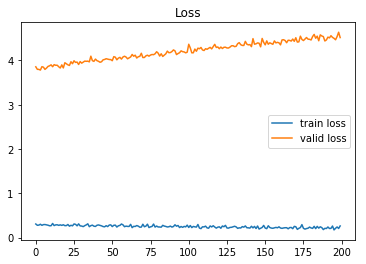

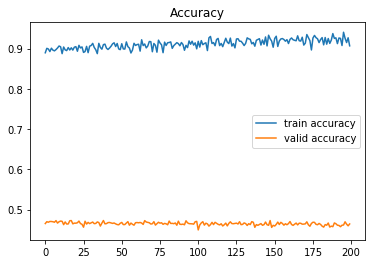

In [17]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss2 = model.history.history["loss"]
valid_loss2 = model.history.history["val_loss"]

train_acc2 = model.history.history["acc"]
valid_acc2 = model.history.history["val_acc"]

plt.plot(range(len(train_loss2)), train_loss2, label="train loss")
plt.plot(range(len(valid_loss2)), valid_loss2, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc2)), train_acc2, label="train accuracy")
plt.plot(range(len(valid_acc2)), valid_acc2, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()